# Exploratory Data Analysis(EDA)

#  Problem:
                The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in the early 1912. It gives you information about multiple people like their ages, sexes, sibling counts,embarkment points and whether they survived the disaster or not. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking.

In [1]:
#importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Titanic dataset 

In [2]:
data = pd.read_csv(r'C:\Users\Oliver Twist\Documents\Jupyter\Datasets\titanic.csv')

In [3]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
data.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


# 1. Categories

In [5]:
data.nunique().sort_values()

survived         2
sex              2
adult_male       2
alive            2
alone            2
pclass           3
embarked         3
class            3
who              3
embark_town      3
sibsp            7
parch            7
deck             7
age             88
fare           248
dtype: int64

The categorical and non-categorical features : The attributes ‘Sex’ and ‘Survived’ had two possible values, properties ‘Embarked’ and ‘Pclass’ had three possible values.

# 2.Missing Values 

In [6]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

The Attribute ‘Age’ had 177 missing values,The ‘Cabin’ attribute had 687 missing values,
The column ‘Embarked’ had  2 missing values.

# 3.Survival 

<AxesSubplot:xlabel='survived', ylabel='count'>

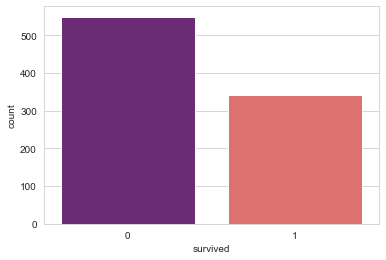

In [7]:
sns.set_style('whitegrid')
sns.countplot(x = 'survived', data = data , palette = 'magma')

A comparison tells us more than 60% of the passengers had died.

# Survival Based on Male and Female Count

<AxesSubplot:xlabel='survived', ylabel='count'>

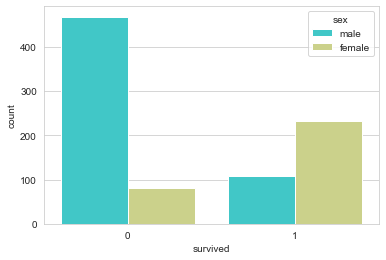

In [8]:
sns.set_style('whitegrid')
sns.countplot(x = 'survived', hue = 'sex', data = data, palette = 'rainbow')

# Survival Baesd on Passenger Class

<AxesSubplot:xlabel='survived', ylabel='count'>

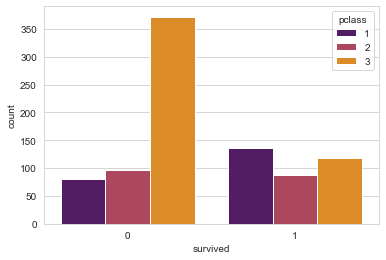

In [9]:
sns.set_style('whitegrid')
sns.countplot(x = 'survived', hue = 'pclass', data = data, palette = 'inferno')

The number of tourists in the third class was more than the number of passengers in the first and second class combined. The survival chances of a class-1 traveler were higher than a class-2 and class-3 traveler.

# 4. Age

<AxesSubplot:xlabel='Age_category', ylabel='count'>

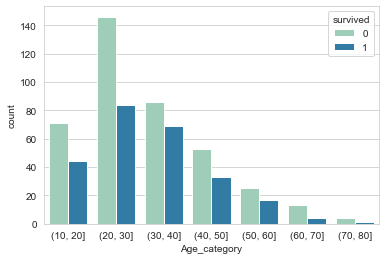

In [10]:
data['Age_category']=pd.cut(data['age'], bins=[10,20,30,40,50,60,70,80])

sns.countplot(x = 'Age_category', hue = 'survived', data = data, palette = 'YlGnBu')

Clearly, Every age group, the number of casualties was higher than the number of survivors.

# 5. SibSp

<AxesSubplot:xlabel='sibsp', ylabel='count'>

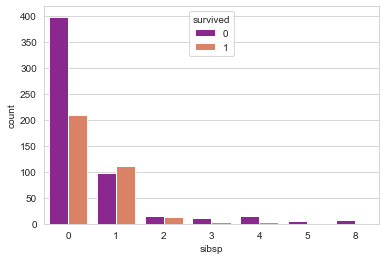

In [11]:
sns.countplot(x = 'sibsp', hue = 'survived', data = data, palette = 'plasma')

 SibSp is the number of siblings or spouse of a person . More than 90% of people traveled alone or with one of their sibling or spouse. The chances of survival dropped drastically if someone traveled with more than 2 siblings or spouse.

# 6.Fare

<AxesSubplot:xlabel='Fare_category', ylabel='count'>

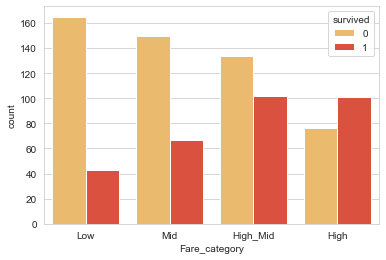

In [12]:
data['Fare_category']=pd.cut(data['fare'], bins = [0,7.90,14.45,31.28,120], labels =['Low','Mid','High_Mid','High'])

sns.countplot(x = 'Fare_category', hue = 'survived', data = data, palette = 'YlOrRd')

The higher a tourist paid, the higher would be his/her chances to survive.

# 7.Embarked

<AxesSubplot:xlabel='embarked', ylabel='count'>

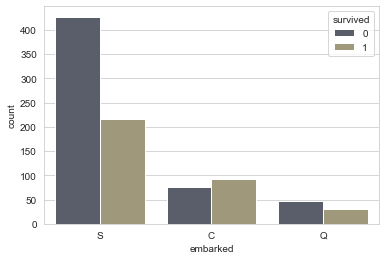

In [13]:
sns.countplot(x = 'embarked',hue = 'survived', data = data, palette = 'cividis')

Embarked mean where they came from. That are  Southampton, Cherbourg, and Queenstown.

# Data Cleaning

# BoxPlot

<AxesSubplot:xlabel='pclass', ylabel='age'>

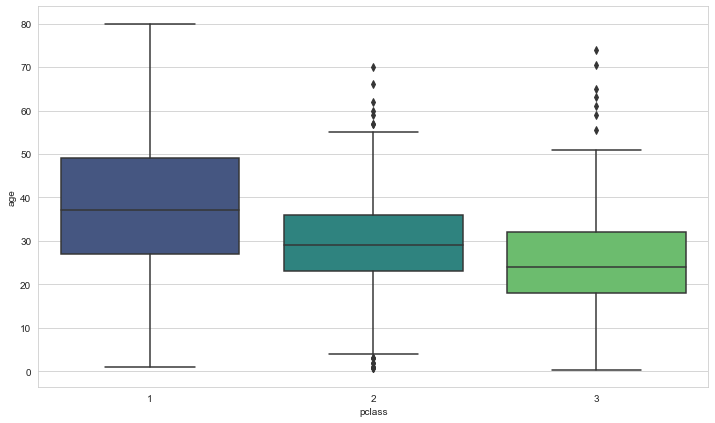

In [14]:
plt.figure(figsize = (12,7))
sns.boxplot(x = 'pclass', y = 'age', data = data, palette ='viridis')

# we can see some relation between 'passenger class' and 'age' column. I'll just use the average age values to fill the empty cells in the age column.

In [15]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

# Imputation process

In [16]:
data['age'] = data[['age', 'pclass']].apply(impute_age, axis = 1)

In [17]:
data.isnull().sum()

survived           0
pclass             0
sex                0
age                0
sibsp              0
parch              0
fare               0
embarked           2
class              0
who                0
adult_male         0
deck             688
embark_town        2
alive              0
alone              0
Age_category     241
Fare_category     53
dtype: int64

# I'll just drop the unwanted columns in dataset 

In [18]:
data.drop(['class','adult_male','deck','embark_town','alive'], axis = 1, inplace = True)

In [19]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,alone,Age_category,Fare_category
0,0,3,male,22.0,1,0,7.2500,S,man,False,"(20, 30]",Low
1,1,1,female,38.0,1,0,71.2833,C,woman,False,"(30, 40]",High
2,1,3,female,26.0,0,0,7.9250,S,woman,True,"(20, 30]",Mid
3,1,1,female,35.0,1,0,53.1000,S,woman,False,"(30, 40]",High
4,0,3,male,35.0,0,0,8.0500,S,man,True,"(30, 40]",Mid


In [20]:
data.dropna(inplace = True)

In [21]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
who              0
alone            0
Age_category     0
Fare_category    0
dtype: int64

# dataset is clean,Now we can proceed with converting categorical features to dummy variables

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 609 entries, 0 to 890
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   survived       609 non-null    int64   
 1   pclass         609 non-null    int64   
 2   sex            609 non-null    object  
 3   age            609 non-null    float64 
 4   sibsp          609 non-null    int64   
 5   parch          609 non-null    int64   
 6   fare           609 non-null    float64 
 7   embarked       609 non-null    object  
 8   who            609 non-null    object  
 9   alone          609 non-null    bool    
 10  Age_category   609 non-null    category
 11  Fare_category  609 non-null    category
dtypes: bool(1), category(2), float64(2), int64(4), object(3)
memory usage: 50.0+ KB


# Converting Categorical to Numerical features

In [23]:
pd.get_dummies(data['embarked'], drop_first = True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


# I am droping the first column because other two is enough to represent the all three columns . I am going to remove some unwanted columns .Replace them with converted categorical columns. 

In [24]:
#I am going for dummy variables for sex and embarked columns. 

sex = pd.get_dummies(data['sex'], drop_first = True)
embark = pd.get_dummies(data['embarked'], drop_first = True)

# Dropping columns

In [25]:
data.drop(['sex','embarked','Age_category','Fare_category','sibsp', 'parch','fare','who'],axis = 1,inplace = True)

I dropped the columns that I did not need for the prediction. I am adding the columns that I had encoded by creating their dummies.

In [26]:
#concatenate data,sex,embark

data = pd.concat([data,sex,embark],axis = 1)

In [27]:
data.head()

,survived,pclass,age,alone,male,Q,S
0,0,3,22.0,False,1,0,1
1,1,1,38.0,False,0,0,0
2,1,3,26.0,True,0,0,1
3,1,1,35.0,False,0,0,1
4,0,3,35.0,True,1,0,1


# Data Visualization

In [28]:
correlation = data.corr()

<AxesSubplot:>

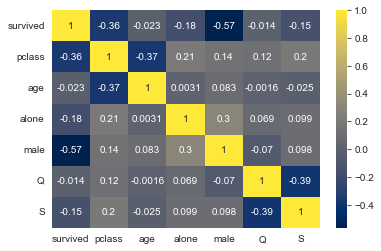

In [29]:
sns.heatmap(correlation, yticklabels = correlation.columns, annot = True, cmap = 'cividis')